## Lab 6 - Frequency

This lab must be done **individually**. The required packages have been imported for you below.

In [36]:
import string
import numpy as np
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt

Load text file. Data from Project Gutenberg (https://www.gutenberg.org/).

In [53]:
txt = open("ulysses.txt","r")

Remove punctuations in text.

In [54]:
remove = dict.fromkeys(map(ord, string.punctuation))

Collapse tokens to lower case.

In [55]:
txt = txt.read().translate(remove).lower()

Construct a dictionary where `key` = word, `value` = count (or frequency).

In [56]:
wordfreq = {}
for word in txt.split():
    if word not in wordfreq:
        wordfreq[word] = 1
    else:
        wordfreq[word] += 1

**Hint**: Print `wordfreq` to see what this dictionary contains.

To work with keys and values in dictionaries, you may refer to https://docs.python.org/2/tutorial/datastructures.html.
Alternatively, refer to the Python tutorial posted on course syllabus.

### Task 1 [2 pts]

**Hint**: For how to `sort` and use `list` comprehension in Python, see the Python tutorial posted on course syllabus.

**Task 1a**: Construct an array of sorted word frequency of all words, and a separate array of word lengths.

In [125]:
# Write your code here.

# Convert dict to array
wordFreqList = [[key, value] for key, value in wordfreq.items()]

# Create sorted word list by frequency, most frequent to least frequent word
sortWordFreqList = [[key, val] for key,val in sorted(wordFreqList, key=lambda x: x[1], reverse=True)]
sortWordByFreqList = [key for key,val in sortWordFreqList]
print ("Word list sorted by frequency: ", sortWordByFreqList[:20])

# Create sorted word frequency list by frequency, highest to lowest
sortedFreqList = [val for key,val in sortWordFreqList]
print ("Word frequency sorted by frequency: ", sortedFreqList[:20])

# Create sorted word length list sorted by frequency
sortWordLengthByFrequencyList = [len(word) for word, freq in sortWordFreqList]
print ("Word list sorted by frequency: ", sortWordLengthByFrequencyList[:20])

Word list sorted by frequency:  ['the', 'of', 'and', 'a', 'to', 'in', 'he', 'his', 'that', 'with', 'i', 'it', 'was', 'on', 'for', 'you', 'her', 'him', 'is', 'all']
Word frequency sorted by frequency:  [15010, 8250, 7216, 6512, 5031, 4974, 3998, 3327, 2586, 2557, 2553, 2351, 2126, 2119, 1950, 1914, 1783, 1522, 1435, 1329]
Word list sorted by frequency:  [3, 2, 3, 1, 2, 2, 2, 3, 4, 4, 1, 2, 3, 2, 3, 3, 3, 3, 2, 3]


**Task 1b**: Construct an array of ranks from on the sorted frequency array in **Task 1a** (using ordinal rank).

In [126]:
# Write your code here.
rankList = [i for i in range(1, len(sortWordByFreqList) + 1)]
print ("Word rank list: ", rankList[:20])
    

Word rank list:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


**Task 1c**: Print the most frequent 20 words and their frequencies. **[1pt]**

In [128]:
# Write your code here.
print ("Top 20 most frequent word and frequencies list: ", sortWordFreqList[:20])
print ("Top 20 words: ", sortWordByFreqList[:20])
print ("Top 20 frequencies: ", sortedFreqList[:20])

Top 20 most frequent word and frequencies list:  [['the', 15010], ['of', 8250], ['and', 7216], ['a', 6512], ['to', 5031], ['in', 4974], ['he', 3998], ['his', 3327], ['that', 2586], ['with', 2557], ['i', 2553], ['it', 2351], ['was', 2126], ['on', 2119], ['for', 1950], ['you', 1914], ['her', 1783], ['him', 1522], ['is', 1435], ['all', 1329]]
Top 20 words:  ['the', 'of', 'and', 'a', 'to', 'in', 'he', 'his', 'that', 'with', 'i', 'it', 'was', 'on', 'for', 'you', 'her', 'him', 'is', 'all']
Top 20 frequencies:  [15010, 8250, 7216, 6512, 5031, 4974, 3998, 3327, 2586, 2557, 2553, 2351, 2126, 2119, 1950, 1914, 1783, 1522, 1435, 1329]


### Task 2 [3 pts]

Produce a 2-by-2 set of subplots using `subplot`: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

**Task 2a**: Scatter plot word frequency (y-axis) against rank (x-axis). **[.5pt]**

**Task 2b**: Scatter plot $log(freq)$ against $log(rank)$. **[.5pt]**

**Task 2c**: Calculate and report the slope from **Task 2b** (via linear regression), i.e. slope of $log(freq)$ vs $log(rank)$. **[.5pt]**

**Task 2d**: Scatter plot frequency against word length. **[.5pt]**

**Task 2e**: Scatter plot $log(freq)$ against word length. **[.5pt]**

The sople for logFreq is:  -0.937594234884065
The sople for logRank is:  -1.0332279368266433


Text(0.5, 1.0, 'Log Frequency vs Log Length')

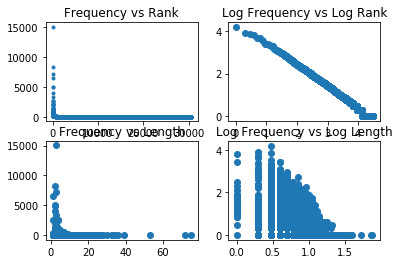

In [60]:
# Task 2a: Scatter plot word frequency (y-axis) against rank (x-axis). [.5pt]
# Write your code here.
plt.subplot(2, 2, 1)
plt.scatter(rankList, sortedFreqList, marker='.')
plt.title("Frequency vs Rank")

# Task 2b: Scatter plot 𝑙𝑜𝑔(𝑓𝑟𝑒𝑞) against 𝑙𝑜𝑔(𝑟𝑎𝑛𝑘). [.5pt]
# Write your code here.
logFreqList = np.log10(sortedFreqList)
logRankList = np.log10(rankList)
plt.subplot(2, 2, 2)
plt.scatter(logRankList, logFreqList)
plt.title("Log Frequency vs Log Rank")

# Task 2c
# Write your code here.
linefit = np.polyfit(logFreqList, logRankList, 1)
slope = linefit[0]
print ("The sople for logFreq is: ", slope)

linefit = np.polyfit(logRankList, logFreqList, 1)
slope = linefit[0]
print ("The sople for logRank is: ", slope)
    
# Task 2d: Scatter plot frequency against word length. [.5pt]
# Write your code here.
plt.subplot(2, 2, 3)
plt.scatter(sortWordLengthByFrequencyList, sortedFreqList)
plt.title("Frequency vs Length")

# Task 2e: Scatter plot 𝑙𝑜𝑔(𝑓𝑟𝑒𝑞) against word length. [.5pt]
# Write your code here.
logWordLengthList = np.log10(sortWordLengthByFrequencyList)
plt.subplot(2, 2, 4)
plt.scatter(logWordLengthList, logFreqList)
plt.title("Log Frequency vs Log Length")

### Task 3 [1 pt]

Calculate and report the Pearson correlation between $log(freq)$ and word length. **[.5pt]**

**Hint**: You may use `scipy.stats.pearsonr`; the first output is Pearson correlation.

In [61]:
# Write your code here.
values = pearsonr(logFreqList, sortWordLengthByFrequencyList)
pearsonCorrelation = values[0]
print ("Pearson Correlation: ", pearsonCorrelation)
print ("Negative pearson correlation values indicates a negative linear relationship")
print ("Which matches the graph above, as the values in y-axis decreases with increase in the x-axis")

Pearson Correlation:  -0.3138729836865021
Negative pearson correlation values indicates a negative linear relationship
Which matches the graph above, as the values in y-axis decreases with increase in the x-axis


### Task 4 [5 pts]

**Task 4a**: Calculate and report the expected word length of English words based on the given data. **[1pt]**

$E[len] = \sum^{i} len(i) * prob(i)$, where $prob(i)$ = normalized frequency of word $i$ (over all available words).

In [99]:
# Write your code here.
def calculateExpectedWordLength(wordList, freqList):
    totalNumWord = np.sum(freqList)
    wordLenProbList = [(len(word) * (freq / totalNumWord)) for word, freq in zip(wordList, freqList)]
    expectedWordLenBySum = np.sum(wordLenProbList)
    return expectedWordLenBySum
expectedWordLen = calculateExpectedWordLength(sortWordByFreqList, sortedFreqList)
print ("Expected Word Length: " , expectedWordLen)

Expected Word Length:  4.503965839656903


**Task 4b**: Perform a shuffled (permutation) test with 1000 shuffled trials. **[1pt]**

In [107]:
# Write your code here.
numTrials = 1000
shuffledTrials = []
randomizedWordList = np.copy(sortWordByFreqList)
randomizedFreqList = np.copy(sortedFreqList)
for i in range(0, numTrials):
    np.random.shuffle(randomizedWordList)
    np.random.shuffle(randomizedFreqList)
    expectedWordLenFromFunc = calculateExpectedWordLength(randomizedWordList, randomizedFreqList)
    shuffledTrials.append(expectedWordLenFromFunc)
    
avgExpectedWordLen = np.mean(shuffledTrials)
print ("Expected Word Length: " , avgExpectedWordLen)

Expected Word Length:  7.520106015758847


**Task 4c**: Based on the shuffled trials, histogram the expected word lengths from the shuffled data. **[.5pt]**

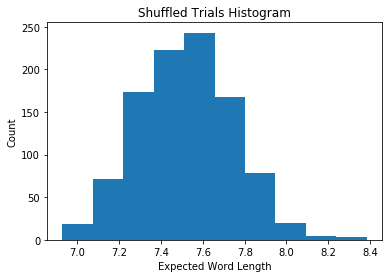

In [108]:
# Write your code here.
plt.hist(shuffledTrials, bins=10) 
plt.title("Shuffled Trials Histogram")
plt.ylabel("Count")
plt.xlabel("Expected Word Length")
plt.show()

**Task 4d**: Calculate and report the _p-value_ from the shuffled test. 

The null hypothesis is that the expected word length is no different from the expected length from shuffled data. 
Based on the _p-value_ you have obtained, conclude whether the null should be rejected $(p<0.05)$. **[.5pt]**

In [109]:
# Write your code here.
numOfItemGreaterExpectedWordLen = np.array(np.where(shuffledTrials >= expectedWordLen)).size
pValue = numOfItemGreaterExpectedWordLen / numTrials
print ("Number of item greater than expected word length: ", numOfItemGreaterExpectedWordLen)
print ("p value: ", pValue)
print ("Since p value is signficiantly greater than the minimum 5% threshold")
print ("We can conclude and reject the null hypothesis (There is no difference) as it is false")

Number of item greater than expected word length:  1000
p value:  1.0
Since p value is signficiantly greater than the minimum 5% threshold
We can conclude and reject the null hypothesis (There is no difference) as it is false


**Task 5**: Propose an alternative way of mapping words to frequencies and show that it produces a lower expected length than the empirical value you calculated, justify your proposal, and print the top 20 most frequent words under this proposal. **[3pts]**

In [124]:
# Write your solution here.
testWordList = np.copy(sortWordByFreqList)
testFreqList = np.copy(sortedFreqList)

# Matches the shorest word with the highest frequency
testWordList = sorted(testWordList, key=lambda x: len(x)) 
testFreqList = sorted(testFreqList, key=lambda x: x, reverse=True)
print ("Word List: ", testWordList[:20])
print ("Frequency List: ", testFreqList[:20])
expectedWordLenFromFunc = calculateExpectedWordLength(testWordList, testFreqList)
print ("Expected Word Length: " , expectedWordLenFromFunc)

print ("By mapping the highest frequency with the shortest word will produces the lowest expected word length")
print ("This is because, then the shorter word will weight much during the calculation")

Word List:  ['a', 'i', 'o', 'j', 's', 'c', 'p', '1', '2', 'b', 'm', '5', 'e', 'd', 'h', 'w', '3', '4', 'f', 'l']
Frequency List:  [15010, 8250, 7216, 6512, 5031, 4974, 3998, 3327, 2586, 2557, 2553, 2351, 2126, 2119, 1950, 1914, 1783, 1522, 1435, 1329]
Expected Word Length:  2.925942376816354
By mapping the highest frequency with the shortest word will produces the lowest expected word length
This is because, then the shorter word will weight much during the calculation


Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. 